In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/Suvendu Khuntia/Downloads/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
# check any null value
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# check any duplicate value
df.duplicated().sum()

0

In [8]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
df.drop(columns=['RowNumber', 'CustomerId','Surname'], inplace=True)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

In [14]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x = df.drop('Exited', axis=1)
y = df['Exited']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [18]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [19]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [23]:
x_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [24]:
x_test_scaled

array([[-5.12501721e-01, -6.77299309e-01, -6.98445493e-01, ...,
         1.73668197e+00, -5.63491843e-01,  9.09111664e-01],
       [-2.36046598e-01,  3.84298354e-01, -1.38035469e+00, ...,
        -5.75810666e-01, -5.63491843e-01,  9.09111664e-01],
       [-4.61306328e-01,  4.80807232e-01, -3.57490896e-01, ...,
        -5.75810666e-01,  1.77464858e+00, -1.09997489e+00],
       ...,
       [ 8.59534812e-01,  7.70333868e-01,  6.65372897e-01, ...,
        -5.75810666e-01, -5.63491843e-01, -1.09997489e+00],
       [ 4.70449825e-01, -9.66825944e-01, -3.57490896e-01, ...,
        -5.75810666e-01, -5.63491843e-01,  9.09111664e-01],
       [-1.84851205e-01, -1.73715981e-03, -1.38035469e+00, ...,
         1.73668197e+00, -5.63491843e-01,  9.09111664e-01]])

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [26]:
model = Sequential()

In [27]:
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

d:\Dl\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(x_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5585 - loss: 0.6676 - val_accuracy: 0.7987 - val_loss: 0.4940
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7919 - loss: 0.4920 - val_accuracy: 0.8006 - val_loss: 0.4450
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8075 - loss: 0.4402 - val_accuracy: 0.8163 - val_loss: 0.4199
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8138 - loss: 0.4170 - val_accuracy: 0.8275 - val_loss: 0.4027
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8261 - loss: 0.3994 - val_accuracy: 0.8331 - val_loss: 0.3903
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8360 - loss: 0.3904 - val_accuracy: 0.8375 - val_loss: 0.3797
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8443 - loss: 0.3784 - val_accuracy: 0.8425 - val_loss: 0.3721
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8481 - loss: 0.3698 - val_accu

In [31]:
model.layers[2].get_weights()

[array([[-0.5295701 ],
        [-1.3379154 ],
        [-1.0252353 ],
        [ 1.3923317 ],
        [ 2.1439044 ],
        [ 1.2189426 ],
        [ 0.5118696 ],
        [-0.4920758 ],
        [ 1.0637236 ],
        [-0.48669976],
        [ 0.51122934]], dtype=float32),
 array([-0.1132273], dtype=float32)]

In [32]:
y_log = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [33]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test, y_pred)

0.861

In [36]:
import matplotlib.pyplot as plt

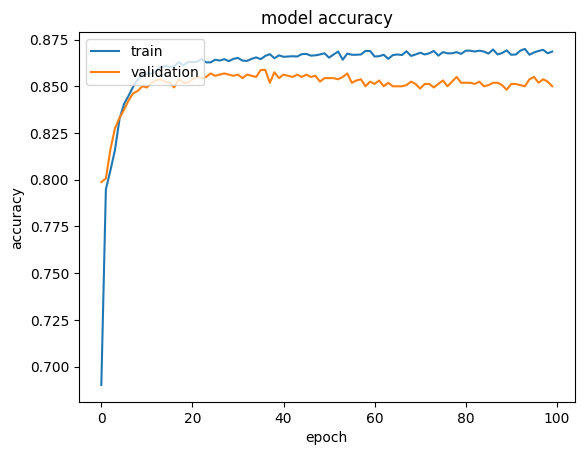

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

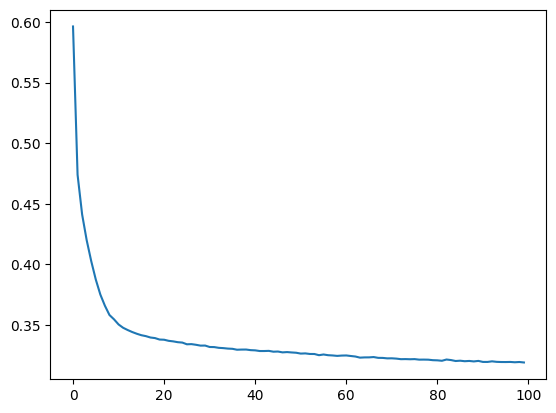

In [38]:
plt.plot(history.history['loss'])